# Анализ и прогнозирование временного ряда.

Цель лабораторной работы: изучение основных методов анализа и прогнозирование временных рядов.


    1) Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.
    2) Визуализируйте временной ряд и его основные характеристики.
    3) Разделите временной ряд на обучающую и тестовую выборку.
    4) Произведите прогнозирование временного ряда с использованием как минимум двух методов.
    5) Визуализируйте тестовую выборку и каждый из прогнозов.
    6) Оцените качество прогноза в каждом случае с помощью метрик.


## 1) Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.

### Импорт библиотек

In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

from datetime import date


import statsmodels.api as sm




from matplotlib import pyplot
import matplotlib.pyplot as plt

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [216]:
df = pd.read_csv('./currency_exchange_rates_02-01-1995_-_02-05-2018.csv')
df = df.head(-3000)

In [276]:
df.dtypes

Date              object
Russian Ruble    float64
Period             int64
dtype: object

In [217]:
df.shape

(2978, 52)

In [218]:
df.describe()

,Algerian Dinar,Australian Dollar,Bahrain Dinar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,Chinese Yuan,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,U.K. Pound Sterling,U.S. Dollar
count,0.0,2846.000000,2.948000e+03,0.0,1887.000000,2676.000000,1910.000000,2785.000000,1902.000000,1881.000000,...,2663.000000,2720.000000,2790.000000,2837.000000,2683.000000,2568.000000,0.0,2949.000000,2911.000000,2978.0
mean,NaN,0.670354,3.760000e-01,NaN,0.299010,1.939318,1.717508,1.412722,568.992434,8.253424,...,6.394235,79.045812,8.156801,1.412337,37.277911,6.195019,NaN,3.672109,1.625574,1.0
std,NaN,0.091659,5.552057e-17,NaN,0.668351,0.816010,0.062274,0.118059,79.590357,0.071618,...,1.970454,18.622141,1.126076,0.180703,7.036977,0.133683,NaN,0.000659,0.127571,0.0
min,NaN,0.483300,3.760000e-01,NaN,0.132750,0.832000,1.000000,1.099000,377.500000,7.997600,...,3.530000,49.570000,6.448500,1.123600,24.440000,5.839300,NaN,3.671000,1.374700,1.0
25%,NaN,0.592800,3.760000e-01,NaN,0.178450,1.093300,1.677700,1.353900,513.500000,8.276600,...,4.700000,60.122500,7.367200,1.259200,36.225000,6.179100,NaN,3.671000,1.546800,1.0
50%,NaN,0.675100,3.760000e-01,NaN,0.194200,1.886900,1.717000,1.409800,540.610000,8.277000,...,6.185000,77.540000,7.868750,1.394900,39.475000,6.264050,NaN,3.672500,1.613000,1.0
75%,NaN,0.751800,3.760000e-01,NaN,0.215600,2.655125,1.752950,1.510900,619.947500,8.277500,...,7.397500,96.940000,8.673750,1.530300,42.049500,6.275900,NaN,3.672500,1.684400,1.0
max,NaN,0.820300,3.760000e-01,NaN,4.841400,3.954400,1.851000,1.613200,758.210000,8.746000,...,13.544500,105.473300,10.995000,1.822800,56.061000,6.327900,NaN,3.672500,1.951200,1.0


In [219]:
selected_columns = df[["Date","Russian Ruble"]]

new_df = selected_columns.copy()

print(new_df)

           Date  Russian Ruble
0      1995-1-2            NaN
1      1995-1-3            NaN
2      1995-1-4            NaN
3      1995-1-5            NaN
4      1995-1-6            NaN
...         ...            ...
2973  2006-6-15        27.0369
2974  2006-6-16        26.9869
2975  2006-6-19        27.0379
2976  2006-6-20        27.0450
2977  2006-6-21        27.0163

[2978 rows x 2 columns]


In [220]:
df = new_df[df['Russian Ruble'].notna()]

In [257]:
print(new_df)

      Period  Russian Ruble
2163       0        31.1105
2164       1        31.1184
2165       2        31.1009
2166       3        31.1001
2167       4        31.1001
...      ...            ...
2973     717        27.0369
2974     718        26.9869
2975     719        27.0379
2976     720        27.0450
2977     721        27.0163

[722 rows x 2 columns]


In [221]:
df.isnull().sum()

Date             0
Russian Ruble    0
dtype: int64

## 2) Визуализируйте временной ряд и его основные характеристики.

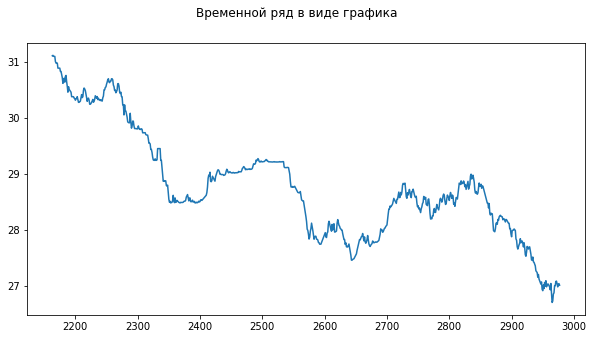

In [222]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
df.plot(ax=ax, legend=False)
pyplot.show()

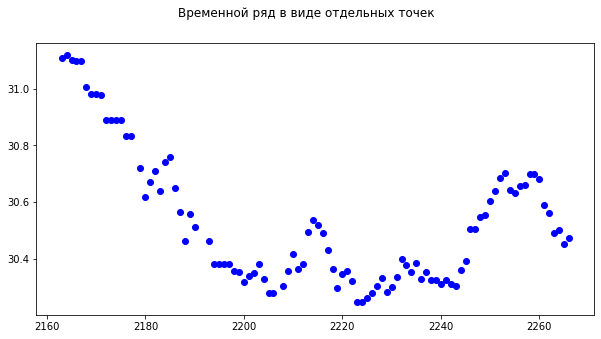

In [223]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде отдельных точек')
df[:100].plot(ax=ax, legend=False, style='bo')
pyplot.show()

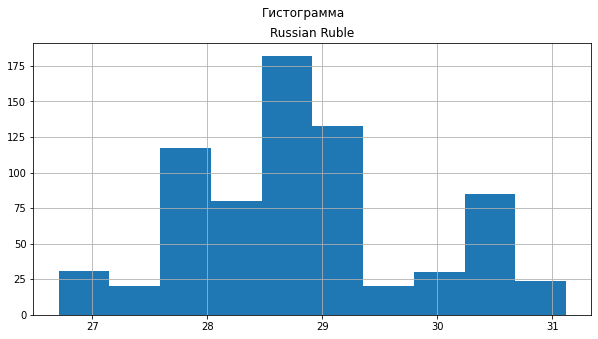

In [224]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
df.hist(ax=ax, legend=False)
pyplot.show()

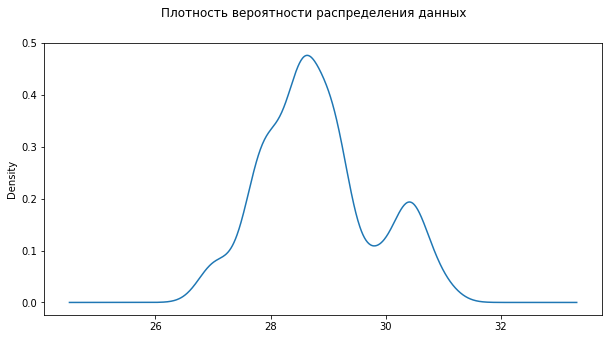

In [225]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
df.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

In [226]:
df.shape

(722, 2)

In [227]:
df_Rubles = df[["Russian Ruble"]]

df_Rubles = df_Rubles.copy()

df_Rubles.shape

(722, 1)


#### Lag Plots

Диаграмма позволяет понять автокорреляцию в данных временного ряда. Может рассматриваться (хотя это весьма грубое сравнение) как аналог корреляционной матрицы для временного ряда.
По оси абсцисс откладывается значение временного ряда.
По оси ординат для каждой точки откладывается ее лаг порядка i, где i - параметр, задаваемый пользователем.

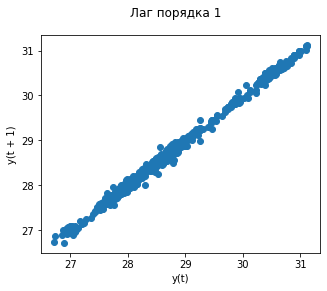

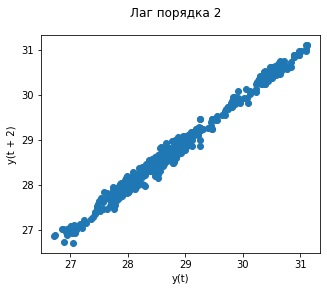

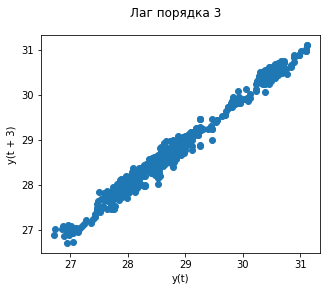

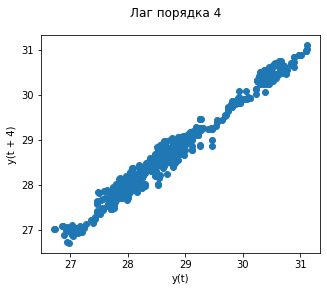

In [228]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(df_Rubles, lag=i, ax=ax)
    pyplot.show()

Если облако точек направлено из левого нижнего угла в правый верхний, то имеет место положительная автокорреляция.

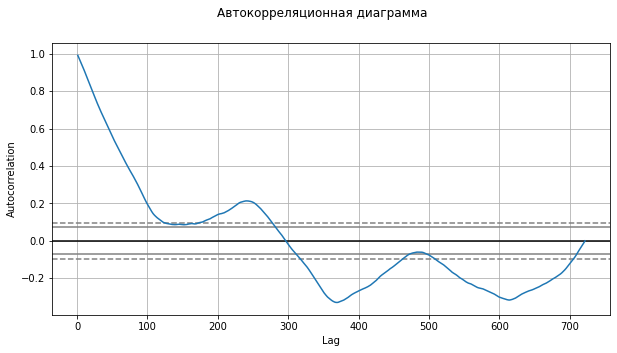

In [229]:
# По оси Y откладывается ковариация 
# https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show

fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(df_Rubles, ax=ax)
pyplot.show()


#### Автокорреляционная функция

Показывает зависимость коэффициента корреляции от лага, то есть корреляцию между исходным временным рядом и временным рядом,сдвинутым на заданный лаг.


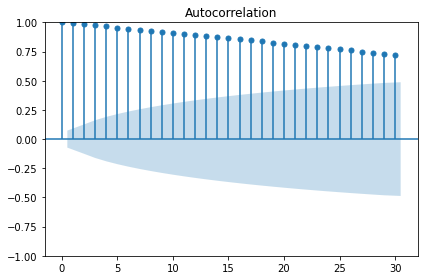

In [230]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_Rubles, lags=30)
plt.tight_layout()

#### Частичная автокорреляционная функция

Находит корреляцию остатков, которые остается после удаления эффектов, объясняемых более ранними лагами.

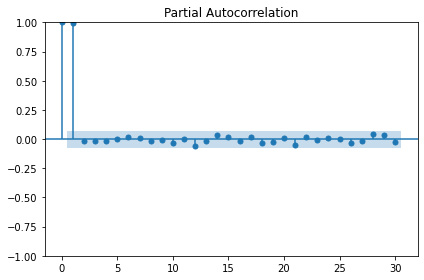

In [231]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_Rubles, lags=30)
plt.tight_layout()

#### Декомпозиция временного ряда с помощью библиотеки statsmodels

2003-5-5

In [242]:
period = []



for i in range (0, 722):
    period.append(i)

In [250]:
df_Period = df
df_Period["Period"] = period
df_Period = df[["Period", "Russian Ruble"]]
df_Period.head()

,Period,Russian Ruble
2163,0,31.1105
2164,1,31.1184
2165,2,31.1009
2166,3,31.1001
2167,4,31.1001


In [256]:
new_df = df[["Period", "Russian Ruble"]]
new_df

,Period,Russian Ruble
2163,0,31.1105
2164,1,31.1184
2165,2,31.1009
2166,3,31.1001
2167,4,31.1001
...,...,...
2973,717,27.0369
2974,718,26.9869
2975,719,27.0379
2976,720,27.0450


In [269]:
tdi = pd.DatetimeIndex(new_df.Period)
new_df.set_index(tdi, inplace=True)
new_df.drop(columns='Period', inplace=True)
new_df.index.name = 'datetimeindex'

In [274]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose
# Аддитивная модель
def plot_decompose(data=df_Rubles['Russian Ruble'], model='add'):
    result_add = seasonal_decompose(data, model = 'add', period = 1)
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

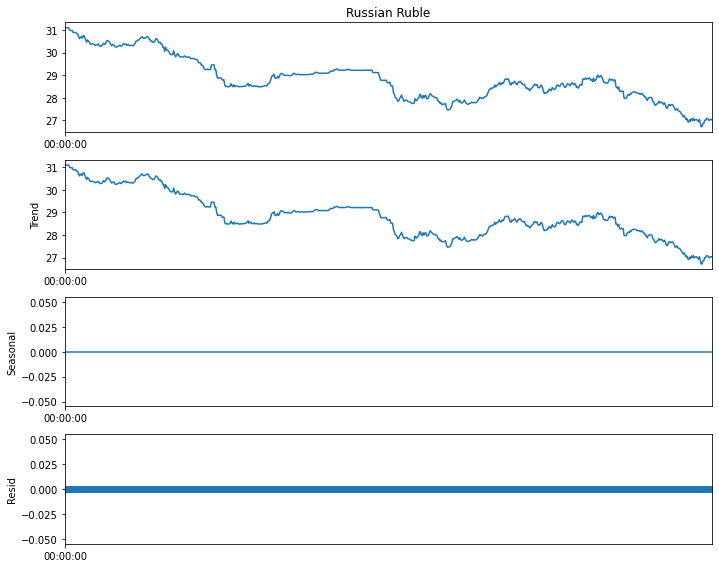

In [275]:
plot_decompose(data=new_df['Russian Ruble'], model='add')